Importing csv file that contain our data and modules

In [55]:
import pandas as pd
import requests
import matplotlib.pylab as plt
import seaborn as sns
import pingouin as pg

In [75]:
pd.options.display.max_columns = 200
data = pd.read_csv('data.csv', sep=';')
data = data.rename(columns={'Nacionality': 'Nationality'}).copy()

Output the columns for our data and top 5 rows for examples

In [57]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nationality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


<h1>Data Cleaning</h1>
Convert values in certain columns to readable values

In [58]:
def Convert_Marital_Status(x):
    if x == 1:
        return 'single'
    elif x == 2:
        return 'married'
    elif x == 3:
        return 'widower'
    elif x == 4:
        return 'divorced'
    elif x == 5:
        return 'civil union'
    elif x == 6:
        return 'legally seperated'
    else:
        return x

def Convert_Attendance_Time(x):
    if x == 0:
        return 'evening'
    elif x == 1:
        return 'daytime'
    else:
        return x

def Convert_Nationality(x):
    if x == 1:
        return 'Portugese'
    elif x == 2:
        return 'German'
    elif x == 6:
        return 'Spanish'
    elif x == 11:
        return 'Italian'
    elif x == 13:
        return 'Dutch'
    elif x == 14:
        return 'English'
    elif x == 17:
        return 'Lithuanian'
    elif x == 21:
        return 'Angolan'
    elif x == 22:
        return 'Cape Verdan'
    elif x == 24:
        return 'Guniean'
    elif x == 25:
        return 'Mozambican'
    elif x == 26:
        return 'Santomean'
    elif x == 32:
        return 'Turkish'
    elif x == 41:
        return 'Brazillian'
    elif x == 62:
        return 'Romanian'
    elif x == 100:
        return 'Moldovan'
    elif x == 101:
        return 'Mexican'
    elif x == 103:
        return 'Ukrainian'
    elif x == 105:
        return 'Russian'
    elif x == 108:
        return 'Cuban'
    elif x == 109:
        return 'Colombian'
    else:
        return x

def Create_Education_Level_Table(x):
    if x in [1, 2, 3, 4, 5, 18, 19, 27, 39, 40, 41, 42, 43, 44]:
        return 1
    elif x in [9, 10, 11, 12, 14, 26, 29, 30, 34, 35, 36, 37, 38]:
        return 0
    else:
        return x

def Convert_Education_Level(x):
    if x == 1:
        return 'Secondary Education - 12th Year of Schooling or Eq'
    elif x == 2 or 40:
        return 'Higher Education - Bachelor\'s Degree'
    elif x == 3:
        return 'Higher Education - Degree'
    elif x == 4 or 43:
        return 'Higher Education - Master\'s'
    elif x == 5 or 44:
        return 'Higher Education - Doctorate'
    elif x == 9:
        return '12th year of schooling - not completed'
    elif x == 10:
        return '11th year of schooling - not completed'
    elif x == 11 or x == 26:
        return '7th year'
    elif x == 12:
        return 'Other'
    elif x == 14:
        return '10th year of schooling - not completed'
    elif x == 18:
        return 'General commerce course'
    elif x == 19:
        return '3rd Cycle (9th/10th/11th Year)'
    elif x == 22:
        return 'Technical professional course'
    elif x == 27:
        return '2nd cycle of general high school'
    elif x == 29:
        return '9th Year of Schooling - Not Completed'
    elif x == 30:
        return '8th Year of Schooling'
    elif x == 34:
        return 'Unknown'
    elif x == 35:
        return 'Can\'t read or write'
    elif x == 36:
        return 'Can read without having a 4th year of schooling'
    elif x == 37:
        return '1st cycle (4th/5th)'
    elif x == 38:
        return '2nd cycle (6th/7th/8th)'
    elif x == 39:
        return 'Technological specialization course'
    elif x == 41:
        return 'Specialized higher studies course'
    elif x == 42:
        return 'Professional higher technical course'
    else:
        return x

def Convert_Occupation(x):
    if x == 0:
        return 'Student'
    elif x == 1:
        return 'Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers'
    elif x == 2:
        return 'Specialists in Intellectual and Scientific Activities'
    elif x == 3:
        return 'Intermediate Level Technicians and Professions'
    elif x == 4:
        return 'Administrative staff'
    elif x == 5:
        return 'Personal Services, Security and Safety Workers and Sellers'
    elif x == 6:
        return 'Farmers and Skilled Workers in Agriculture, Fisheries and Forestry'
    elif x == 7:
        return 'Skilled Workers in Industry, Construction and Craftsmen'
    elif x == 8:
        return 'Installation and Machine Operators and Assembly Workers'
    elif x == 9:
        return 'Unskilled Workers'
    elif x == 10:
        return 'Armed Forces Professions'
    elif x == 90:
        return 'Other Situation'
    elif x == 99:
        return 'Blank'
    elif x == 122:
        return 'Health professionals'
    elif x == 123:
        return 'Teachers'
    elif x == 125:
        return 'Specialists in information and communication technologies (ICT)'
    elif x == 131:
        return 'Intermediate level science and engineering technicians and professions'
    elif x == 132:
        return 'Technicians and professionals, of intermediate level of health'
    elif x == 134:
        return 'Intermediate level technicians from legal, social, sports, cultural and similar services'
    elif x == 141:
        return 'Office workers, secretaries in general and data processing operators'
    elif x == 143:
        return 'Data, accounting, statistical, financial services and registry-related operators'
    elif x == 144:
        return 'Other administrative support staff'
    elif x == 151:
        return 'Personal service workers'
    elif x == 152:
        return 'Sellers'
    elif x == 153:
        return 'Personal care workers'
    elif x == 154:
        return 'Protection and security services personnel'
    elif x == 155:
        return 'Market-oriented farmers and skilled agricultural and animal production workers'
    elif x == 157:
        return 'Farmers, livestock keepers, fishermen, hunters and gatherers, subsistence'
    elif x == 171:
        return 'Skilled construction workers and the like, except electricians'
    elif x == 172:
        return 'Skilled workers in metallurgy, metalworking and similar'
    elif x == 174:
        return 'Skilled workers in electricity and electronics'
    elif x == 175:
        return 'Workers in food processing, woodworking, clothing and other industries and crafts'
    elif x == 181:
        return 'Fixed plant and machine operators'
    elif x == 182:
        return 'Assembly workers'
    elif x == 183:
        return 'Vehicle drivers and mobile equipment operators'
    elif x == 192:
        return 'Unskilled workers in agriculture, animal production, fisheries and forestry'
    elif x == 193:
        return 'Unskilled workers in extractive industry, construction, manufacturing and transport'
    elif x == 194:
        return 'Meal preparation assistants'
    elif x == 195:
        return 'Street vendors (except food) and street service providers'
    else:
        return x

def Convert_Displaced(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'
    else:
        return x

def Convert_Educational_Special_Needs(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'
    else:
        return x


def Convert_Debtor(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return  'yes'
    else:
        return x

def Convert_Tuition_Fees_Up_To_Date(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'
    else:
        return x

def Convert_Gender(x):
    if x == 0:
        return 'female'
    elif x == 1:
        return 'male'
    else:
        return x

def Convert_Scholarship_Holder(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'
    else:
        return x

def Convert_International(x):
    if x == 0:
        return 'no'
    elif x == 1:
        return 'yes'
    else:
        return x

data['Marital status'] = data['Marital status'].apply(Convert_Marital_Status).copy()
data['Daytime/evening attendance'] = data['Daytime/evening attendance'].apply(Convert_Attendance_Time).copy()
data['Nationality'] = data['Nationality'].apply(Convert_Nationality).copy()
data['Previous qualification'] = data['Previous qualification'].apply(Convert_Education_Level).copy()
data['Father\'s qualification'] = data['Father\'s qualification'].apply(Convert_Education_Level).copy()
data['Mother\'s qualification'] = data['Mother\'s qualification'].apply(Convert_Education_Level).copy()
data['Father\'s occupation'] = data['Father\'s occupation'].apply(Convert_Occupation).copy()
data['Mother\'s occupation'] = data['Mother\'s occupation'].apply(Convert_Occupation).copy()
data['Displaced'] = data['Displaced'].apply(Convert_Displaced).copy()
data['Educational special needs'] = data['Educational special needs'].apply(Convert_Educational_Special_Needs).copy()
data['Debtor'] = data['Debtor'].apply(Convert_Debtor).copy()
data['Tuition fees up to date'] = data['Tuition fees up to date'].apply(Convert_Tuition_Fees_Up_To_Date).copy()
data['Scholarship holder'] = data['Scholarship holder'].apply(Convert_Scholarship_Holder).copy()
data['International'] = data['International'].apply(Convert_International).copy()
data.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Mother's Education Level,Father's Education Level,Parent's Education Level
0,single,17,5,171,daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portugese,Higher Education - Bachelor's Degree,Higher Education - Bachelor's Degree,"Personal Services, Security and Safety Workers...",Unskilled Workers,127.3,1,no,no,1,1,no,20,no,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,1,0,1
1,single,15,1,9254,daytime,Secondary Education - 12th Year of Schooling o...,160.0,Portugese,Secondary Education - 12th Year of Schooling o...,Higher Education - Bachelor's Degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,142.5,1,no,no,0,1,no,19,no,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,1,1,2
2,single,1,5,9070,daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portugese,Higher Education - Bachelor's Degree,Higher Education - Bachelor's Degree,Unskilled Workers,Unskilled Workers,124.8,1,no,no,0,1,no,19,no,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0,0,0
3,single,17,2,9773,daytime,Secondary Education - 12th Year of Schooling o...,122.0,Portugese,Higher Education - Bachelor's Degree,Higher Education - Bachelor's Degree,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,119.6,1,no,no,1,0,no,20,no,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,0,0,0
4,married,39,1,8014,evening,Secondary Education - 12th Year of Schooling o...,100.0,Portugese,Higher Education - Bachelor's Degree,Higher Education - Bachelor's Degree,Unskilled Workers,Unskilled Workers,141.5,0,no,no,1,0,no,45,no,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,0,0,0
5,married,39,1,9991,evening,Higher Education - Bachelor's Degree,133.1,Portugese,Higher Education - Bachelor's Degree,Higher Education - Bachelor's Degree,Unskilled Workers,"Skilled Workers in Industry, Construction and ...",114.8,0,no,yes,1,1,no,50,no,0,5,10,5,11.857143,0,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate,0,0,0
6,single,1,1,9500,daytime,Secondary Education - 12th Year of Schooling o...,142.0,Portugese,Higher Education - Bachelor's Degree,Higher Education - Bachelor's Degree,"Skilled Workers in Industry, Construction and ...",Armed Forces Professions,128.4,1,no,no,1,0,yes,18,no,0,7,9,7,13.300000,0,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate,1,0,1
7,single,18,4,9254,daytime,Secondary Education - 12th Year of Schooling o...,119.0,Portugese,Higher Education - Bachelor's Degree,Higher Education - Bachelor's Degree,Unskilled Workers,Unskilled Workers,113.1,1,no,no,0,1,no,22,no,0,5,5,0,0.000000,0,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout,0,0,0
8,single,1,3,9238,daytime,Secondary Education - 12th Year of Schooling o...,137.0,Romanian,Secondary Education - 12th Year of Schooling o...,Secondary Education - 12th Year of Schooling o...,Unskilled Workers,Unskilled Workers,129.3,0,no,no,1,0,yes,21,yes,0,6,8,6,13.875000,0,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate,1,1,2
9,single,1,1,9238,daytime,Secondary Education - 12th Year of Schooling o...,138.0,Portugese,Secondar

In [59]:
data.describe()

,Application mode,Application order,Course,Previous qualification (grade),Admission grade,Displaced,Tuition fees up to date,Gender,Age at enrollment,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Mother's Education Level,Father's Education Level,Parent's Education Level
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.642631,132.613314,126.978119,0.548373,0.880651,0.351718,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969,0.608725,0.572785,1.181510
std,17.484682,1.313793,2063.566416,13.188332,14.482001,0.497711,0.324235,0.477560,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935,0.608126,1.175583,1.431948
min,1.000000,0.000000,33.000000,95.000000,95.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,9085.000000,125.000000,117.900000,0.000000,1.000000,0.000000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000,0.000000,0.000000,0.000000
50%,17.000000,1.000000,9238.000000,133.100000,126.100000,1.000000,1.000000,0.000000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000,1.000000,1.000000,1.000000
75%,39.000000,2.000000,9556.000000,140.000000,134.800000,1.000000,1.000000,1.000000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000,1.000000,1.000000,2.000000
max,57.000000,9.000000,9991.000000,190.000000,190.000000,1.000000,1.000000,1.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000,22.000000,33.000000,34.000000


Text(0.5, 0, 'Admission Grade')

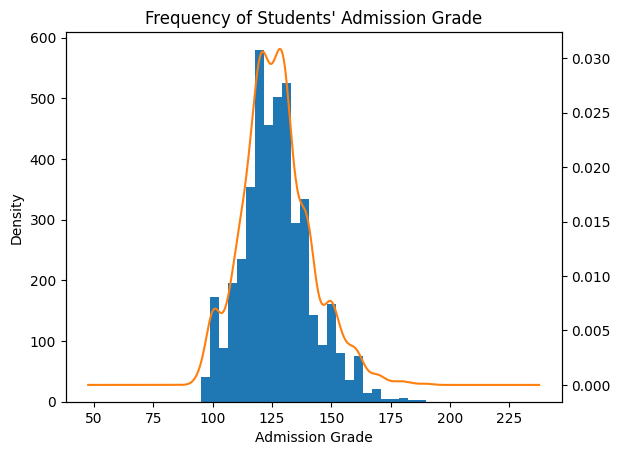

In [77]:
if ('Mother\'s Education Level' not in data.columns):
    data['Mother\'s Education Level'] = data['Mother\'s qualification'].apply(Create_Education_Level_Table).copy()
    data['Father\'s Education Level'] = data['Father\'s qualification'].apply(Create_Education_Level_Table).copy()
    data['Parent\'s Education Level'] = data['Mother\'s Education Level'] + data['Father\'s Education Level']
AdmissionGradeHist = data['Admission grade'].plot(kind='hist', title='Frequency of Students\' Admission Grade', bins = 25)
data['Admission grade'].plot(kind='kde', ax = AdmissionGradeHist, secondary_y=True)
AdmissionGradeHist.set_xlabel('Admission Grade')

Text(0.5, 0, 'Grade')

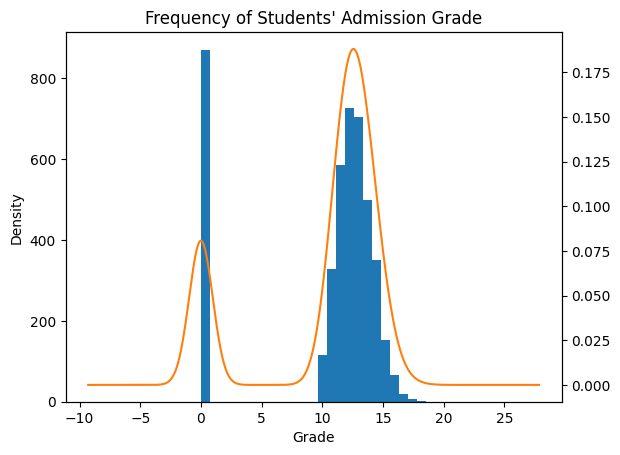

In [78]:
SecondSemGradeHist = data['Curricular units 2nd sem (grade)'].plot(kind='hist', title='Frequency of Students\' Admission Grade', bins = 25)
data['Curricular units 2nd sem (grade)'].plot(kind='kde', ax = SecondSemGradeHist, secondary_y=True)
SecondSemGradeHist.set_xlabel('Grade')

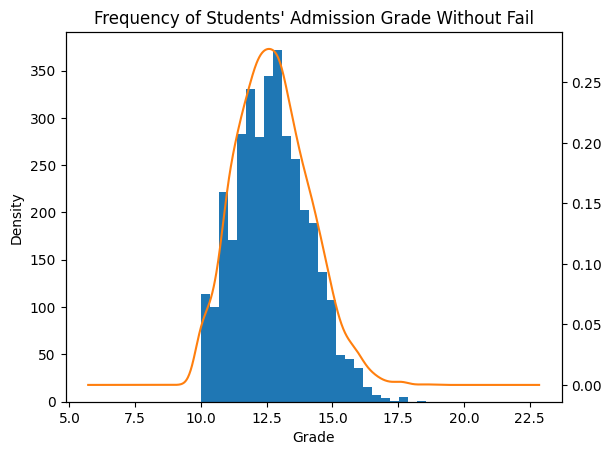

In [79]:
GradesWithoutFail = data.loc[data['Curricular units 2nd sem (grade)'] > 0]['Curricular units 2nd sem (grade)']
SecondSemGradeHist = GradesWithoutFail.plot(kind='hist', title='Frequency of Students\' Admission Grade Without Fail', bins = 25)
GradesWithoutFail.plot(kind='kde', ax = SecondSemGradeHist, secondary_y=True)
SecondSemGradeHist.set_xlabel('Grade')
plt.show()

0.27625304322996586

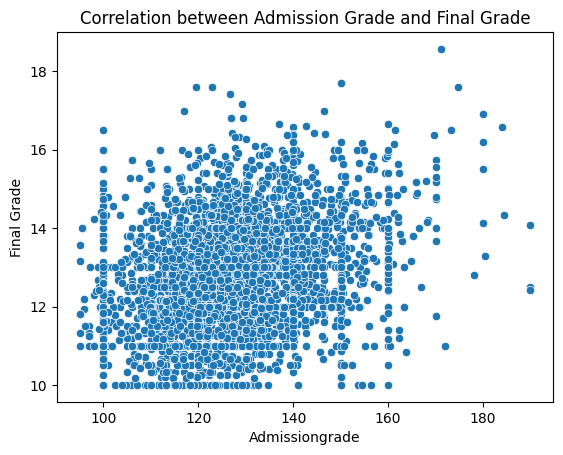

In [80]:
data['Final Grade'] = GradesWithoutFail
sns.scatterplot(x='Admission grade', y='Final Grade', data = data).set(xlabel='Admissiongrade', ylabel='Final Grade', title='Correlation between Admission Grade and Final Grade')
data['Admission grade'].corr(data['Final Grade'])

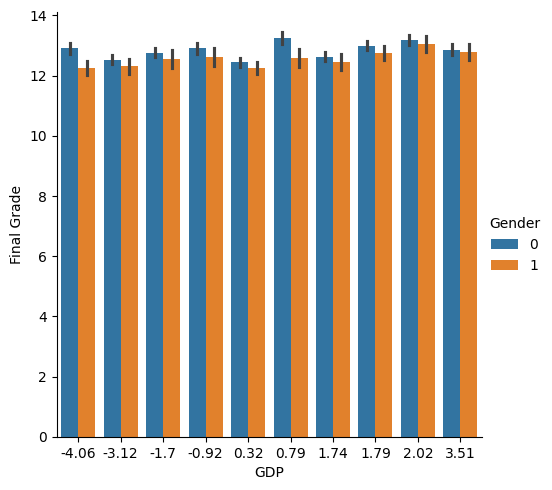

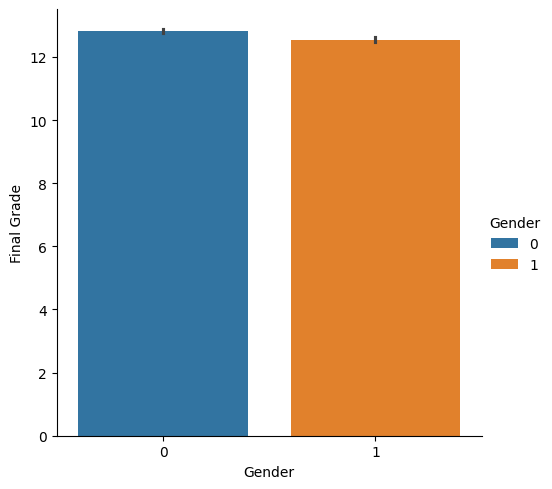

Gender
0    2868
1    1556
Name: count, dtype: int64
Likelihood of Women:
Target
Graduate    57.914923
Dropout     25.104603
Enrolled    16.980474
Name: count, dtype: float64
Likelihood of Men:
Target
Dropout     45.051414
Graduate    35.218509
Enrolled    19.730077
Name: count, dtype: float64


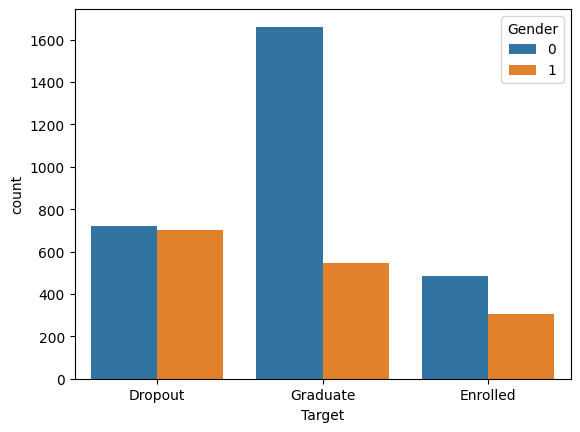

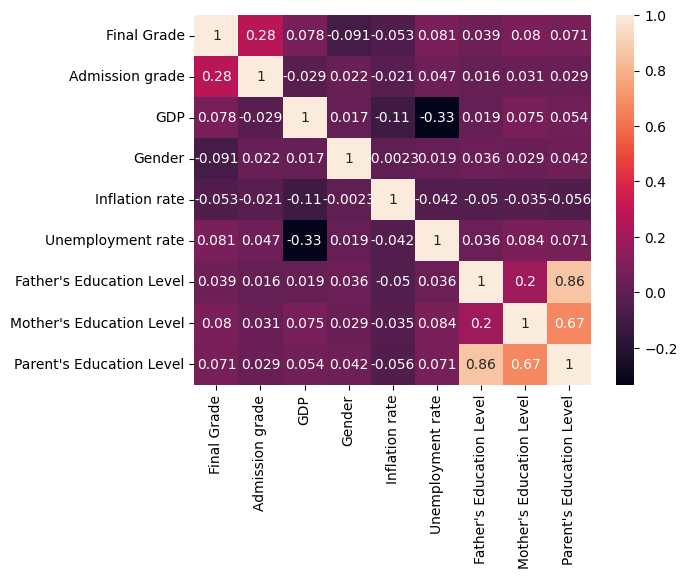

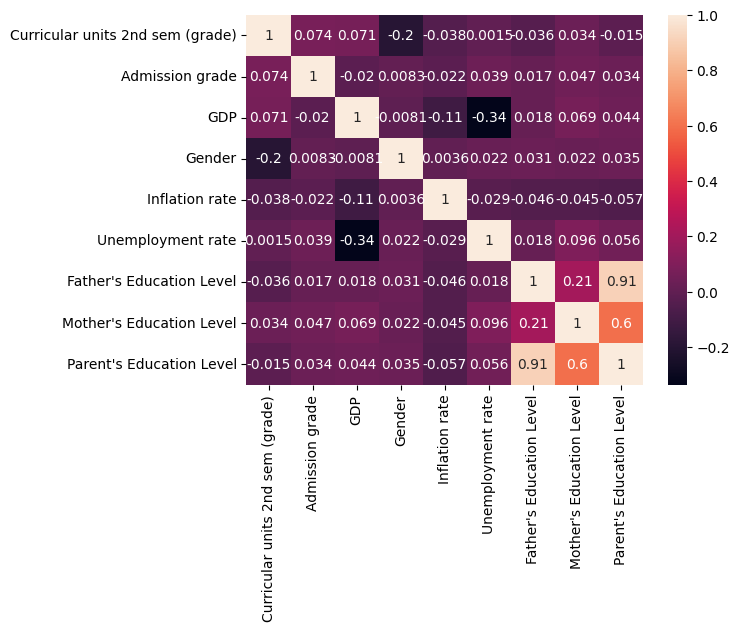

In [81]:
sns.catplot(kind='bar', x='GDP', y='Final Grade', data = data, hue = 'Gender').set(ylabel='Final Grade')
plt.show()
sns.catplot(kind='bar', x='Gender', y='Final Grade', data = data, hue = 'Gender').set(ylabel='Final Grade')
plt.show()
print(data['Gender'].value_counts())
print('Likelihood of Women:')
print(data.loc[data['Gender'] == 0, 'Target'].value_counts()/28.68)
print('Likelihood of Men:')
print(data.loc[data['Gender'] == 1, 'Target'].value_counts()/15.56)
sns.countplot(x='Target', data = data, hue = 'Gender')
plt.show()
dataCorr = data[['Final Grade', 'Admission grade', 'GDP', 'Gender', 'Inflation rate', 'Unemployment rate', 'Father\'s Education Level', 'Mother\'s Education Level', 'Parent\'s Education Level']].dropna().corr()
sns.heatmap(dataCorr, annot=True)
plt.show()
dataCorr = data[['Curricular units 2nd sem (grade)', 'Admission grade', 'GDP', 'Gender', 'Inflation rate', 'Unemployment rate', 'Father\'s Education Level', 'Mother\'s Education Level', 'Parent\'s Education Level']].dropna().corr()
sns.heatmap(dataCorr, annot=True)
plt.show()

In [82]:
pg.partial_corr(data = data, x = 'Father\'s Education Level', y = 'Final Grade', y_covar=['Mother\'s Education Level', 'Gender', 'GDP', 'Inflation rate', 'Displaced', 'Tuition fees up to date'])

,n,r,CI95%,p-val
pearson,3554,0.024248,"[-0.01, 0.06]",0.148664


In [83]:
pg.partial_corr(data = data, x = 'Mother\'s Education Level', y = 'Final Grade', y_covar=['Father\'s Education Level', 'Gender', 'GDP', 'Inflation rate', 'Displaced', 'Tuition fees up to date'])

,n,r,CI95%,p-val
pearson,3554,0.066365,"[0.03, 0.1]",0.000076


In [84]:
pg.partial_corr(data = data, x = 'Gender', y = 'Final Grade', y_covar=['Father\'s Education Level', 'Mother\'s Education Level', 'GDP', 'Inflation rate', 'Displaced', 'Tuition fees up to date'])

,n,r,CI95%,p-val
pearson,3554,-0.091109,"[-0.12, -0.06]",5.415459e-08


In [85]:
pg.partial_corr(data = data, x = 'Inflation rate', y = 'Final Grade', y_covar=['Father\'s Education Level', 'Mother\'s Education Level', 'GDP', 'Gender', 'Displaced', 'Tuition fees up to date'])

,n,r,CI95%,p-val
pearson,3554,-0.041788,"[-0.07, -0.01]",0.012786


In [86]:
pg.partial_corr(data = data, x = 'Displaced', y = 'Final Grade', y_covar=['Father\'s Education Level', 'Mother\'s Education Level', 'GDP', 'Gender', 'Inflation rate', 'Tuition fees up to date ])

,n,r,CI95%,p-val
pearson,3554,0.019955,"[-0.01, 0.05]",0.234633
